# DiploDatos 2021


### Categorización de publicaciones de productos realizadas en Mercado Libre

### 01 - Análisis y Visualización

#### Condiciones generales que aplican a todos los prácticos:
   - Las notebooks tienen que ser 100% reproducibles, es decir al ejecutar las celdas tal cuál como se entrega la notebook se deben obtener los mismos resultados sin errores.
   - Código legible, haciendo buen uso de las celdas de la notebook y en lo posible seguir estándares de código para *Python* (https://www.python.org/dev/peps/pep-0008/).
   - Utilizar celdas tipo *Markdown* para ir guiando el análisis.
   - Limpiar el output de las celdas antes de entregar el notebook (ir a *Kernel* **-->** *Restart Kernel and Clear All Ouputs*).
   - Incluir conclusiones del análisis que se hizo en la sección "Conclusiones". Tratar de aportar valor en esta sección, ser creativo.

## 1. Consignas

#### Sección A:  Estadísticas básicas & Visualizaciones

Por cada uno de los siguientes puntos realizar un análisis para poder responder el enunciado/pregunta y generar alguna gráfica para visualizar los resultados:

1. ¿Cuántas publicaciones de items hay dentro de cada categoría?
2. Proporción de publicaciones en español y portugués dentro de cada categoría.
3. Proporción de label quality dentro de cada categoría.
4. Relación entre el label quality y el idioma.

#### Sección B: Estadísticas de las publicaciones & Visualizaciones

Por cada uno de los siguientes puntos realizar un análisis para poder responder el enunciado/pregunta y generar alguna gráfica para visualizar los resultados:

1. Cantidad promedio de palabras del título de la publicacion por categoría.
2. Análisis general de *stopwords*, números, caracteres especiales, etc.. Puede ser un recuento promedio por publicación, no es necesario realizar una gráfica en este punto.
3. Palabras más frecuentes dentro de cada categoría (sin incluir *stopwords*, números, caracteres especiales, etc.).

Tener en cuenta librerías como *NLTK* y *spaCy* para el procesamiento de texto.

## 2. Código y Análisis

Importaciones necesarias

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px

# Make sure it's 4.14.3
plotly.__version__

'4.14.3'

Lectura de dataset reducido

In [2]:
df_dataset = pd.read_csv('DataSet/dataset.csv')

Estudiamos el dataset brevemente antes de comenzar a operar sobre el mismo

In [3]:
df_dataset.describe()

,title,label_quality,language,category
count,646760,646760,646760,646760
unique,646019,2,2,20
top,Teclado Sintetizador Korg X5d,unreliable,portuguese,PANTS
freq,2,551878,328992,35973


In [4]:
print(f'Dimensiones: {df_dataset.shape}')

Dimensiones: (646760, 4)


In [5]:
print(f'Variables: {list(df_dataset.columns)}')

Variables: ['title', 'label_quality', 'language', 'category']


In [6]:
print(f'Etiquetas: {list(df_dataset.label_quality.unique())}')

Etiquetas: ['unreliable', 'reliable']


In [7]:
print(f'Lenguajes: {list(df_dataset.language.unique())}')

Lenguajes: ['portuguese', 'spanish']


In [8]:
print(f'Categorías: {list(df_dataset.category.unique())}')

Categorías: ['SEWING_MACHINES', 'MUSICAL_KEYBOARDS', 'REFRIGERATORS', 'BABY_CAR_SEATS', 'WALL_CLOCKS', 'BABY_STROLLERS', 'SHORTS', 'SUITCASES', 'PUREBRED_DOGS', 'ROLLER_SKATES', 'COFFEE_MAKERS', 'WINES', 'MATTRESSES', 'PANTS', 'MEMORY_CARDS', 'ELECTRIC_DRILLS', 'MOTORCYCLE_JACKETS', 'HAIR_CLIPPERS', 'RANGES', 'KITCHEN_SINKS']


Tenemos 646760 productos en nuestro dataframe, con las variables
- `title` la mayoría de los títulos son únicos
- `label_quality` solo se separan en *unreliable* y *reliable*
- `language` solo se separan en *portuguese* y *spanish*
- `category` hay un total de veinte categorías diferentes

## Sección A

#### 1 - Contamos la cantidad de publicaciones por categoría.

In [9]:
category_count = df_dataset.category\
    .value_counts()\
    .reset_index()\
    .rename(columns={'index': 'category', 'category': 'count'})

category_count

,category,count
0,PANTS,35973
1,COFFEE_MAKERS,35104
2,BABY_CAR_SEATS,34163
3,MUSICAL_KEYBOARDS,33222
4,MATTRESSES,32967
5,PUREBRED_DOGS,32928
6,RANGES,32645
7,REFRIGERATORS,32635
8,MOTORCYCLE_JACKETS,32615
9,HAIR_CLIPPERS,32372


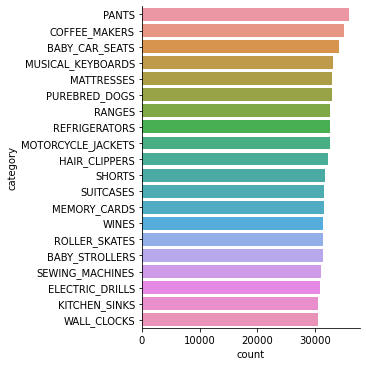

In [10]:
# Cantidad de publicaciones por categoría
sns.catplot(x='count', y='category', data=category_count, kind='bar');

**Conclusión**

- La categoría `PANTS` es la más común (35973 publicaciones).
- La categoría `WALL_CLOCKS` es la menos común (30600 publicaciones).

Podíamos decir que las categorías están bastante balancedas, teniendo en cuenta que la mayor diferencia entre la cantidad de publicaciones por categoría es cercana a 5000.
Obviamente, esto es consecuencia de haber tomar las 20 categorías más repetidas en el dataset original de **ML**.

#### 2 - Proporción de publicaciones en español y portugués dentro de cada categoría.

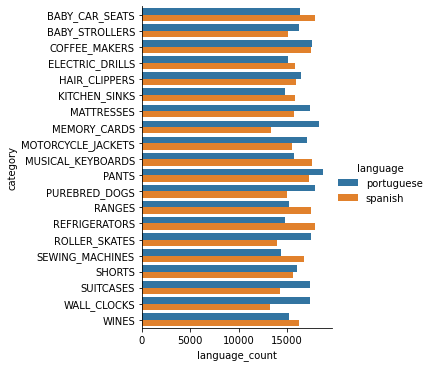

In [11]:
# Tomamos las columnas relevantes
relevant_cols = ['category', 'language']

# Agregamos según el lenguaje
category_language_count = df_dataset\
    .groupby(relevant_cols)\
    .agg(language_count=('language', 'count'))\
    .reset_index()

# Cantidad de publicaciones en español y en portugués dentro de cada categoría
sns.catplot(x='language_count',
            y='category',
            hue ='language',
            data=category_language_count,
            kind='bar');

In [12]:
# Normalizar nos permite obtener la proporción (en lugar de la cantidad)
category_language_count = pd.crosstab(index=df_dataset['category'],
                                      columns=df_dataset['language'],
                                      normalize='index',
                                      margins=True)

category_language_count

language,portuguese,spanish
category,,
BABY_CAR_SEATS,0.476832,0.523168
BABY_STROLLERS,0.518100,0.481900
COFFEE_MAKERS,0.501567,0.498433
ELECTRIC_DRILLS,0.488125,0.511875
HAIR_CLIPPERS,0.508897,0.491103
KITCHEN_SINKS,0.482912,0.517088
MATTRESSES,0.525071,0.474929
MEMORY_CARDS,0.578412,0.421588
MOTORCYCLE_JACKETS,0.523655,0.476345


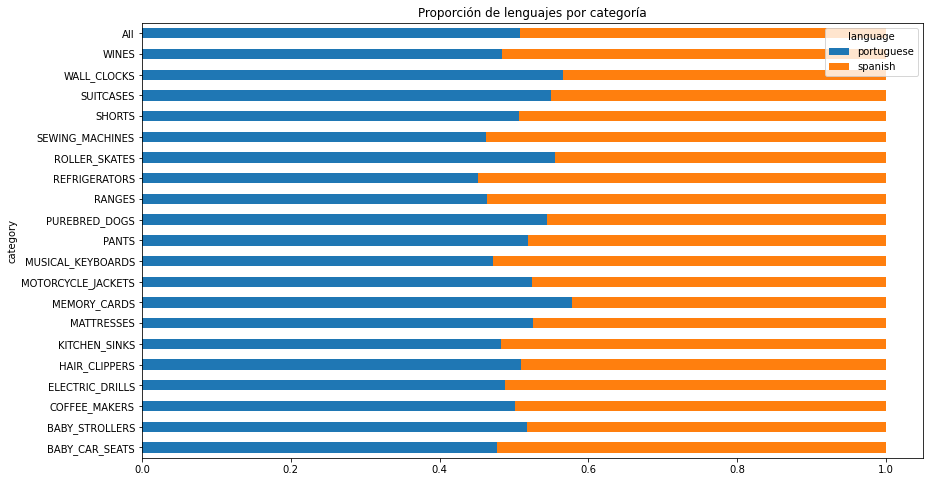

In [13]:
# Visualizamos la proporción de publicaciones en cada idioma, por categoría
category_language_count.plot.barh(stacked=True,
                                  figsize=(14, 8),
                                  title='Proporción de lenguajes por categoría');

**Conclusión**

- La cantidad de publicaciones en cada idioma es similar.
    - Portugués **50.9%**
    - Español **49.1%**

- Hay **12** categorías con mayor cantidad de publicaciones en portugués.
  Por lo tanto, hay **8** categorías con mayor cantidad de publicaciones en español.

- La categoría con mayor proporción de portugués es `MEMORY_CARDS` con **57.8%**.
- La categoría con mayor proporción de español es `REFRIGERATORS` con **54.8%**.

#### 3 - Proporción de etiquetas dentro de cada categoría.

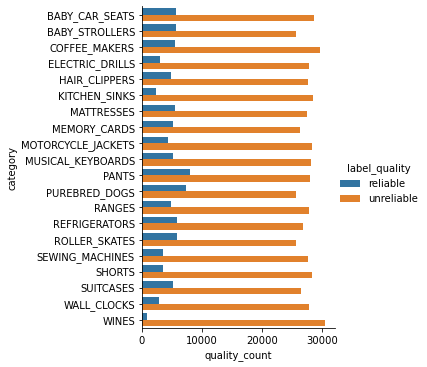

In [14]:
# Tomamos las columnas relevantes
relevant_cols = ['category', 'label_quality']

# Agregamos según la etiqueta
category_quality_count = df_dataset\
    .groupby(relevant_cols)\
    .agg(quality_count=('label_quality', 'count'))\
    .reset_index()

# Cantidad de etiquetas dentro de cada categoría
sns.catplot(x='quality_count',
            y='category',
            hue ='label_quality',
            data=category_quality_count,
            kind='bar');

In [15]:
# Normalizar nos permite obtener la proporción (en lugar de la cantidad)
category_quality_count = pd.crosstab(index=df_dataset['category'],
                                     columns=df_dataset['label_quality'],
                                     normalize='index',
                                     margins=True)

category_quality_count

label_quality,reliable,unreliable
category,,
BABY_CAR_SEATS,0.165208,0.834792
BABY_STROLLERS,0.181960,0.818040
COFFEE_MAKERS,0.155737,0.844263
ELECTRIC_DRILLS,0.099319,0.900681
HAIR_CLIPPERS,0.149296,0.850704
KITCHEN_SINKS,0.073674,0.926326
MATTRESSES,0.168411,0.831589
MEMORY_CARDS,0.165663,0.834337
MOTORCYCLE_JACKETS,0.131320,0.868680


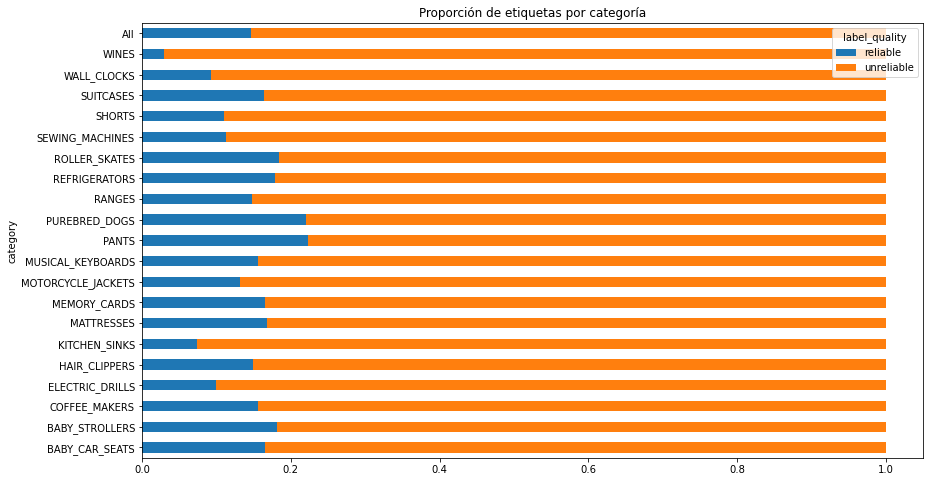

In [16]:
# Visualizamos la proporción de etiquetas, por categoría
category_quality_count.plot.barh(stacked=True,
                                 figsize=(14, 8),
                                 title='Proporción de etiquetas por categoría');

**Conclusión**

- La cantidad de publicaciones con cada etiqueta es notoriamente diferente.
    - Confiable **14.7%**
    - No Confiable **85.3%**

- Ninguna categoría tiene una mayor cantidad de publicaciones verificadas, que no verificadas.

- La categoría con mayor proporción de publicaciones verificadas es `PANTS` con **22.3%**.
- La categoría con mayor proporción de publicaciones no verificadas es `WINES` con **97.1%**.

#### 4 - Relación entre la etiqueta y el lenguaje.

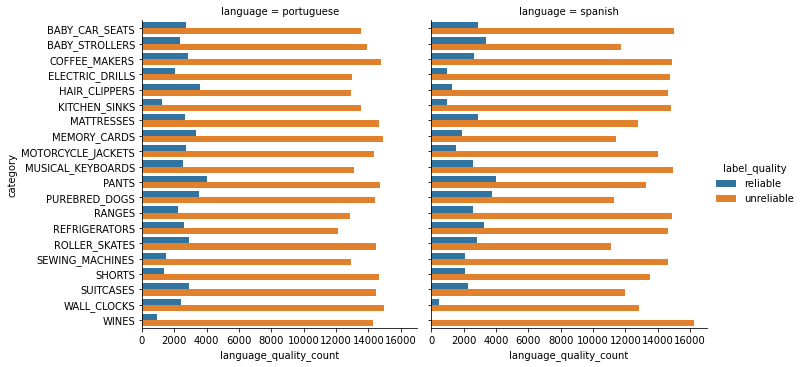

In [17]:
# Tomamos las columnas relevantes
relevant_cols = ['category', 'language', 'label_quality']

# Agregamos según la categoría
category_language_quality_count = df_dataset\
    .groupby(relevant_cols)\
    .agg(language_quality_count=('category', 'count'))\
    .reset_index()

# Cantidad de lenguajes / etiquetas dentro de cada categoría
sns.catplot(x='language_quality_count',
            y='category',
            hue='label_quality',
            col='language',
            data=category_language_quality_count,
            kind='bar');

In [18]:
# Normalizar nos permite obtener la proporción (en lugar de la cantidad)
language_quality_count = pd.crosstab(index=df_dataset['language'],
                                     columns=df_dataset['label_quality'],
                                     normalize=True,
                                     margins=True)

language_quality_count

label_quality,reliable,unreliable,All
language,,,
portuguese,0.078111,0.430566,0.508677
spanish,0.068593,0.422730,0.491323
All,0.146704,0.853296,1.000000


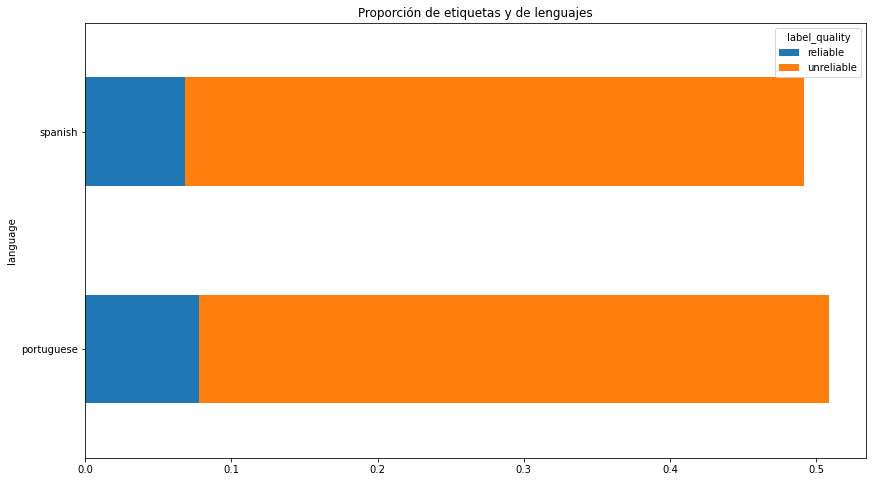

In [19]:
# Visualizamos la proporción de etiquetas y de lenguajes
df_aux = language_quality_count.drop(index='All').drop(columns='All')

df_aux.plot.barh(stacked=True,
                 figsize=(14, 8),
                 title='Proporción de etiquetas y de lenguajes');

**Conclusión**

Si se toma un publicación cualquiera del dataset, lo más probable es obtener una publicación en portugués no verificada (**43.1%**), mientras que lo menos probable es obtener una publicación en español verificada (**6.9%**).

## Sección B

#### 1 - Cantidad promedio de palabras en el título de la publicación por categoría.

In [25]:
df_dataset
df_dataset2 = df_dataset.copy()

In [26]:
# Calculo cantidad de palabras de cada título, y lo agrego a la columna countWord
f = lambda df_dataset2: len(df_dataset2['title'].split())
df_dataset2['countWord'] = df_dataset2.apply(f, axis=1)

In [27]:
count_percent_word_category = df_dataset2.groupby('category', as_index=False).mean()
count_percent_word_category

,category,countWord
0,BABY_CAR_SEATS,7.879694
1,BABY_STROLLERS,7.251651
2,COFFEE_MAKERS,7.231284
3,ELECTRIC_DRILLS,8.143543
4,HAIR_CLIPPERS,8.017144
5,KITCHEN_SINKS,8.778619
6,MATTRESSES,7.944611
7,MEMORY_CARDS,9.218318
8,MOTORCYCLE_JACKETS,7.395156
9,MUSICAL_KEYBOARDS,6.869213


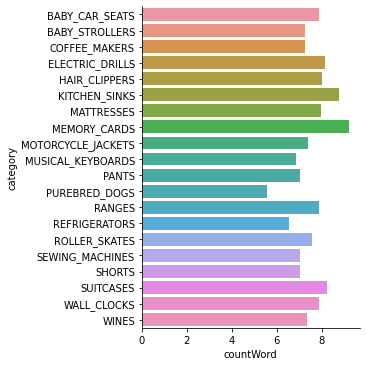

In [28]:
# Mostramos en catplot el promedio de cantidad de palabras por categoría
sns.catplot(x='countWord', y='category', data=count_percent_word_category, kind='bar');

#### 2 - Análisis general de stopwords, números, caracteres especiales, etc.

#### 3 - Palabras más frecuentes dentro de cada categoría.

# Borrador: Usando NLTK

In [29]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [30]:
from nltk.tokenize import word_tokenize

# Copiamos el dataset original
df_nlp = df_dataset.copy()

In [31]:
def tokenizer(row):
    """
    Por cada título de publicación, aplicamos el tokenizer.
    """
    return set(word_tokenize(row.title))

In [32]:
# Queremos algo manejable para probar...
aux = df_nlp.sample(5000)

In [33]:
top_N = 5

aux['tokens'] = aux.apply(tokenizer, axis=1)

aux.sample(5)

,title,label_quality,language,category,tokens
155538,Dada 1 2 3 De Finca Las Moras,unreliable,spanish,WINES,"{1, Finca, 2, Moras, De, Dada, Las, 3}"
168170,Calça Jeans King Farm Masculina Tradicional Gr...,unreliable,portuguese,PANTS,"{Farm, Calça, Masculina, Green, Tradicional, J..."
374256,Bermuda Cc Grisino,unreliable,spanish,SHORTS,"{Bermuda, Grisino, Cc}"
257321,Mala De Viagem - Grande Com Rodinhas / Batiki,unreliable,portuguese,SUITCASES,"{Batiki, Mala, Grande, -, Viagem, De, Com, Rod..."
120500,Cuba De Sobrepor Quadrada 93931602 Inox Válvul...,unreliable,portuguese,KITCHEN_SINKS,"{Quadrada, Válvula, Tramontina, Cuba, Inox, So..."


In [34]:
# Convierte todos los títulos de las publicaciones en un solo texto.
doc = aux.title.str.lower().str.cat(sep=' ')

words = nltk.tokenize.word_tokenize(doc)
word_dist = nltk.FreqDist(words)
print (word_dist)

rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Freq'])

# Hay demasiadas stop words...
rslt

<FreqDist with 8904 samples and 38900 outcomes>


,Word,Freq
0,de,1312
1,-,657
2,!,371
3,+,331
4,",",265


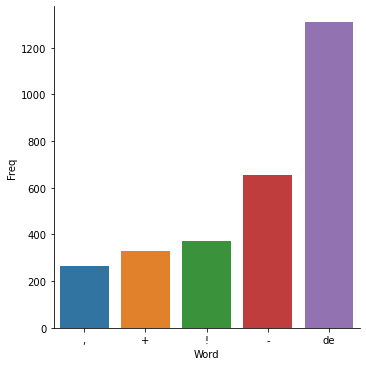

In [35]:
sns.catplot(x='Word', y='Freq', data=rslt.sort_values('Freq'), kind='bar');

# Borrador: Usando Spacy

In [36]:
# Copiamos el dataset original
df_nlp = df_dataset.copy()

In [37]:
import spacy

"""
TODO: Quizás una optimización posible sería cargar solamente los
componentes que vamos a utilizar, es decir, el tokenizer y el tagger
"""

# Modelo para procesar Español
nlp_es = spacy.load('es')
# Modelo para procesar Portugués
nlp_pt = spacy.load('pt')

In [38]:
nlp_lang = {'spanish': nlp_es, 'portuguese': nlp_pt}

def tokenizer(row):
    """
    Dada una fila del dataset, aplica el procesamiento al título:
    - Tokenizer: separa en tokens
    - Tagger: agrega información sintáctica/semántica
    Es importante procesar de acuerdo al lenguaje de la publicación.
    """
    nlp = nlp_lang[row.language]
    # Por cuestiones de eficiencia, solo aplicamos estas etapas.
    return nlp.tagger(nlp.tokenizer(row.title))

In [39]:
# Queremos algo manejable para probar...
aux = df_nlp.sample(5000)

In [40]:
aux['tokens'] = aux.apply(tokenizer, axis=1)

aux.sample(5)

,title,label_quality,language,category,tokens
355040,"Set De 2 Valijas Chica Y Grande, Marca Owen, C...",unreliable,spanish,SUITCASES,"(Set, De, 2, Valijas, Chica, Y, Grande, ,, Mar..."
190974,Pantalón Elastizado Calza Gruesa Tiro Alto Bri...,unreliable,spanish,PANTS,"(Pantalón, Elastizado, Calza, Gruesa, Tiro, Al..."
115881,Korg M1 - Miralo...!! N0 Roland Xps10 Spdsx Kr...,reliable,spanish,MUSICAL_KEYBOARDS,"(Korg, M1, -, Miralo, ..., !, !, N0, Roland, X..."
37996,Caniches Blanco -semi Apricot -nac 14/06/18,reliable,spanish,PUREBRED_DOGS,"(Caniches, Blanco, -semi, Apricot, , -nac, 14..."
358529,Cortapelo Remington Hc1095 12 Piezas Lh Cuotas,unreliable,spanish,HAIR_CLIPPERS,"(Cortapelo, Remington, Hc1095, 12, Piezas, Lh,..."


In [41]:
# Ejercicio 1: Contar la cantidad de tokens.
aux_ammount_tokens = aux.copy()

aux_ammount_tokens['ammount_tokens'] = aux_ammount_tokens.tokens.apply(lambda tokens: len(tokens))

aux_ammount_tokens.sample(5)

,title,label_quality,language,category,tokens,ammount_tokens
127320,Piattelli Arlene Serie Blend - Cafayate Salta ...,unreliable,spanish,WINES,"(Piattelli, Arlene, Serie, Blend, -, Cafayate,...",9
82778,Cafeteira Expresso Italiana 4 Cafés Xícaras Aç...,unreliable,portuguese,COFFEE_MAKERS,"(Cafeteira, Expresso, Italiana, 4, Cafés, Xíca...",8
303114,Filhote Pug Abricot Mini,unreliable,portuguese,PUREBRED_DOGS,"(Filhote, Pug, Abricot, Mini)",4
540255,Bacha Cocina Johnson Luxor Si85 + 4 Acc Y Grif...,unreliable,spanish,KITCHEN_SINKS,"(Bacha, Cocina, Johnson, Luxor, Si85, +, 4, Ac...",11
639585,Cadeira Para Auto Graco Maxi-15 A 36 Kg. Novis...,unreliable,portuguese,BABY_CAR_SEATS,"(Cadeira, Para, Auto, Graco, Maxi-15, A, 36, K...",11


In [42]:
relevant_cols = ['category', 'ammount_tokens']

aux_ammount_tokens = aux_ammount_tokens[relevant_cols].groupby('category')\
    .agg(ammount_tokens_mean=('ammount_tokens', 'mean'))\
    .reset_index()

aux_ammount_tokens

,category,ammount_tokens_mean
0,BABY_CAR_SEATS,8.427509
1,BABY_STROLLERS,7.574297
2,COFFEE_MAKERS,7.426160
3,ELECTRIC_DRILLS,8.746032
4,HAIR_CLIPPERS,8.470356
5,KITCHEN_SINKS,9.327354
6,MATTRESSES,8.708502
7,MEMORY_CARDS,10.899281
8,MOTORCYCLE_JACKETS,7.821970
9,MUSICAL_KEYBOARDS,7.529412


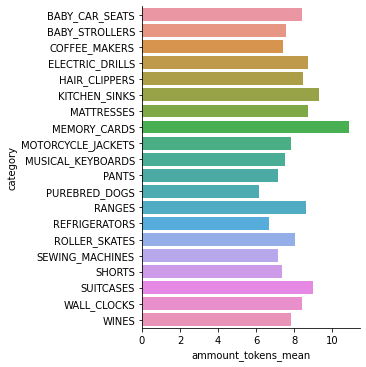

In [43]:
# Mostramos en catplot el promedio de cantidad de tokens por categoría
sns.catplot(x='ammount_tokens_mean', y='category', data=aux_ammount_tokens, kind='bar');

In [44]:
# Ejercicio 2: Contar la cantidad de stop words.
aux_ammount_stop_words = aux.copy()

count_stop_words = lambda tokens: sum(map(lambda t: t.is_stop, tokens))

aux_ammount_stop_words['ammount_stop_words'] = aux_ammount_stop_words.tokens.apply(count_stop_words)

aux_ammount_stop_words.sample(5)

,title,label_quality,language,category,tokens,ammount_stop_words
335618,Patins 4 Rodas Clássico Branco Rosa Menina Rol...,unreliable,portuguese,ROLLER_SKATES,"(Patins, 4, Rodas, Clássico, Branco, Rosa, Men...",0
469638,"Coche Quinny Buzz. Color Rojo, 1 Año De Uso.",unreliable,spanish,BABY_STROLLERS,"(Coche, Quinny, Buzz, ., Color, Rojo, ,, 1, Añ...",2
32500,Cocina Bigas Cg956i 56cm 4 Hornallas Grill Ge ...,unreliable,spanish,RANGES,"(Cocina, Bigas, Cg956i, 56, cm, 4, Hornallas, ...",0
45791,Cafeteira Italiana 6 Xícaras 300ml C/válvula S...,unreliable,portuguese,COFFEE_MAKERS,"(Cafeteira, Italiana, 6, Xícaras, 300ml, C, /,...",0
549152,Yamaha Psr S650 Psrs650 Workstation 61 Tecla S...,unreliable,spanish,MUSICAL_KEYBOARDS,"(Yamaha, Psr, S650, Psrs650, Workstation, 61, ...",0


In [45]:
relevant_cols = ['category', 'ammount_stop_words']

aux_ammount_stop_words = aux_ammount_stop_words[relevant_cols].groupby('category')\
    .agg(ammount_stop_words_mean=('ammount_stop_words', 'mean'))\
    .reset_index()

aux_ammount_stop_words

,category,ammount_stop_words_mean
0,BABY_CAR_SEATS,0.985130
1,BABY_STROLLERS,0.843373
2,COFFEE_MAKERS,0.561181
3,ELECTRIC_DRILLS,0.595238
4,HAIR_CLIPPERS,1.003953
5,KITCHEN_SINKS,0.713004
6,MATTRESSES,0.445344
7,MEMORY_CARDS,0.503597
8,MOTORCYCLE_JACKETS,0.295455
9,MUSICAL_KEYBOARDS,0.431373


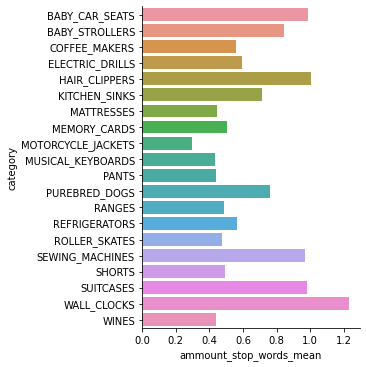

In [46]:
# Mostramos en catplot el promedio de cantidad de stop words por categoría
sns.catplot(x='ammount_stop_words_mean', y='category', data=aux_ammount_stop_words, kind='bar');

In [47]:
# Ejercicio 3: Encontrar las palabras más repetidas.
from collections import Counter

aux_ammount_words = aux.copy()

count_words = lambda tokens: Counter([t.text for t in tokens if not t.is_stop])

aux_ammount_words['ammount_words'] = aux_ammount_words.tokens.apply(count_words)

aux_ammount_words.sample(5)

,title,label_quality,language,category,tokens,ammount_words
149019,Prancha Para Carrinho Britax - Suporte Para Ma...,unreliable,portuguese,BABY_STROLLERS,"(Prancha, Para, Carrinho, Britax, -, Suporte, ...","{'Prancha': 1, 'Carrinho': 1, 'Britax': 1, '-'..."
228543,Estelar Malbec De Bodega Domiciano,unreliable,spanish,WINES,"(Estelar, Malbec, De, Bodega, Domiciano)","{'Estelar': 1, 'Malbec': 1, 'Bodega': 1, 'Domi..."
535293,Trimmer Eléctrico Con Luz Led L959 Looking Goo...,unreliable,spanish,HAIR_CLIPPERS,"(Trimmer, Eléctrico, Con, Luz, Led, L959, Look...","{'Trimmer': 1, 'Eléctrico': 1, 'Luz': 1, 'Led'..."
212381,"Cachorros Salchichas,preciosos",reliable,spanish,PUREBRED_DOGS,"(Cachorros, Salchichas, ,, preciosos)","{'Cachorros': 1, 'Salchichas': 1, ',': 1, 'pre..."
551350,Fogão De Piso Electrolux 4 Queimadores Inox Bi...,unreliable,portuguese,RANGES,"(Fogão, De, Piso, Electrolux, 4, Queimadores, ...","{'Fogão': 1, 'Piso': 1, 'Electrolux': 1, '4': ..."


In [48]:
def agg_counter_sum(series):
    """
    Cada publicación tendrá un conteo de las palabras utilizadas en su título.
    Agrupando por categoría, sumamos los contadores de cada publicación.
    """
    return sum(series, Counter())

In [49]:
relevant_cols = ['category', 'ammount_words']

aux_ammount_words = aux_ammount_words[relevant_cols].groupby('category')\
    .agg(ammount_words_counter=('ammount_words', agg_counter_sum))\
    .reset_index()

aux_ammount_words

,category,ammount_words_counter
0,BABY_CAR_SEATS,"{'Bebê': 36, 'Conforto': 36, 'Galzerano': 6, '..."
1,BABY_STROLLERS,"{'Carrinho': 116, 'Kiddo': 12, 'Iii': 1, 'Maly..."
2,COFFEE_MAKERS,"{'Cafetera': 109, 'Italiana': 20, 'Gat': 1, 'L..."
3,ELECTRIC_DRILLS,"{'Rotor': 1, 'Taladro': 111, 'Black&decker': 1..."
4,HAIR_CLIPPERS,"{'Máquina': 37, 'Profissional': 21, 'Cortar': ..."
5,KITCHEN_SINKS,"{'Rejilla': 1, 'Desagote': 1, 'Acero': 36, 'An..."
6,MATTRESSES,"{'Colchão': 115, 'Ortopédico': 3, 'Solteiro': ..."
7,MEMORY_CARDS,"{'Cartao': 12, 'Sony': 9, 'Sdxc': 27, 'Filmage..."
8,MOTORCYCLE_JACKETS,"{'Jaqueta': 144, 'Forza': 4, 'City': 4, 'Rider..."
9,MUSICAL_KEYBOARDS,"{'Kit': 4, 'Teclado': 173, 'Arranjador': 18, '..."


In [50]:
# Nos quedamos con las 'top_words' de cada categoría.
top_words = 3

top_words_df = aux_ammount_words.copy()

top_words_df['ammount_words_counter'] = top_words_df['ammount_words_counter']\
                                        .apply(lambda x: x.most_common(top_words))

top_words_df

,category,ammount_words_counter
0,BABY_CAR_SEATS,"[(Auto, 100), (Butaca, 82), (-, 69)]"
1,BABY_STROLLERS,"[(Carrinho, 116), (Bebê, 75), (Cochecito, 52)]"
2,COFFEE_MAKERS,"[(Cafetera, 109), (Cafeteira, 84), (-, 36)]"
3,ELECTRIC_DRILLS,"[(Furadeira, 128), (Taladro, 111), (Impacto, 1..."
4,HAIR_CLIPPERS,"[(Maquina, 71), (Wahl, 69), (Cabelo, 60)]"
5,KITCHEN_SINKS,"[(Bacha, 101), (Johnson, 91), (Cocina, 87)]"
6,MATTRESSES,"[(Colchão, 115), (Colchon, 74), (Colchón, 50)]"
7,MEMORY_CARDS,"[(gb, 216), (Sd, 151), (Micro, 150)]"
8,MOTORCYCLE_JACKETS,"[(Jaqueta, 144), (Campera, 105), (Moto, 61)]"
9,MUSICAL_KEYBOARDS,"[(Teclado, 173), (Casio, 79), (Yamaha, 61)]"


Claramente no alcanza con filtrar las *stop words*, también debemos eliminar la puntuación, los símbolos, los números, y los espacios.

In [51]:
# Para un gráfico de barras, deberíamos acomodar nuestro df
list_df = []
for index, row in top_words_df.iterrows():
    for word, count in row.ammount_words_counter:
        list_df.append((row.category, word, count))

plot_df = pd.DataFrame(list_df, columns=['category', 'word', 'count'])

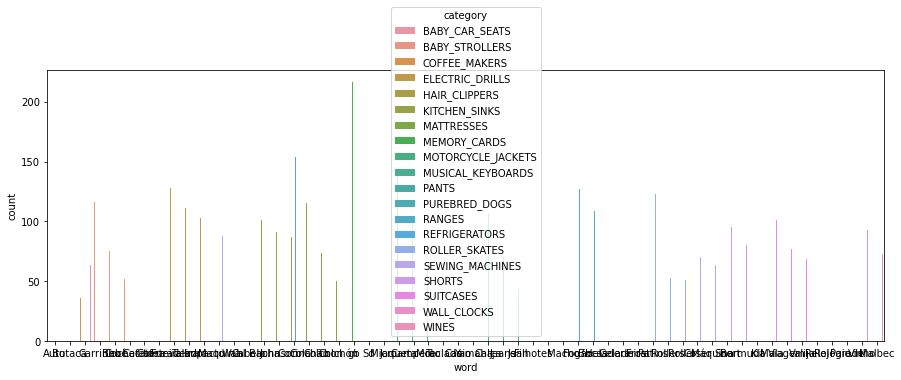

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

"""
TODO: Quizás ploty sea un mejor visualizador...
"""
sns.barplot(x='word', y='count', hue='category', data=plot_df);

# ---------- Borrador ----------

In [53]:
"""
TODO: En realidad quisiéramos contar las siguientes POS
- ENUM: Números y todo lo que sirva para enumerar
- PUNCT: Puntuaciones y lo relacionado
- SYM: Símbolos y caracteres no relacionados al alfabeto
- SPACE: Espacios y lo demás
"""

# Tomamos un título de una publicación cualquiera
ejemplo = aux.iloc[0]['tokens']

for t in ejemplo:
    print(f'¿Es un sustantivo? {t.pos_ == "NOUN"}')
    print(f'Texto {t.text}, Infinitivo {t.lemma_}, POS {t.pos_}, Explicación {spacy.explain(t.pos_)}, ¿Es Stop Word? {t.is_stop}')

¿Es un sustantivo? False
Texto Valija, Infinitivo Valija, POS PROPN, Explicación proper noun, ¿Es Stop Word? False
¿Es un sustantivo? False
Texto Kangol, Infinitivo Kangol, POS PROPN, Explicación proper noun, ¿Es Stop Word? False
¿Es un sustantivo? False
Texto 1, Infinitivo 1, POS NUM, Explicación numeral, ¿Es Stop Word? False
¿Es un sustantivo? False
Texto Solo, Infinitivo Solo, POS PROPN, Explicación proper noun, ¿Es Stop Word? True
¿Es un sustantivo? False
Texto Uso, Infinitivo Uso, POS PROPN, Explicación proper noun, ¿Es Stop Word? True
¿Es un sustantivo? False
Texto Ultralight, Infinitivo Ultralight, POS PROPN, Explicación proper noun, ¿Es Stop Word? False


**STOPWORD**

In computing, **stop words** are words which are filtered out before or after *processing of natural language* data (text).
Though **stop words** usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list.

Necesitamos modelos para cada uno de los lenguajes.

**Portugués**
- `pt_core_news_sm`

**Español**
- `es_core_news_sm`

In [54]:
import spacy

nlp_es = spacy.load('es')

doc = nlp_es('Esto es una frase.')

print([(w.text, w.pos_) for w in doc])

[('Esto', 'PRON'), ('es', 'AUX'), ('una', 'DET'), ('frase', 'NOUN'), ('.', 'PUNCT')]


In [55]:
cols = ('text', 'lemma', 'POS', 'explain', 'stopword')
rows = []

for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

pd.DataFrame(rows, columns=cols)

,text,lemma,POS,explain,stopword
0,Esto,Esto,PRON,pronoun,True
1,es,ser,AUX,auxiliary,True
2,una,uno,DET,determiner,True
3,frase,frase,NOUN,noun,False
4,.,.,PUNCT,punctuation,False


In [56]:
from spacy import displacy

displacy.render(doc, style='dep')

In [57]:
# Stop Words para Español
from spacy.lang.es.stop_words import STOP_WORDS

print(f'Cantidad SW para Español: {len(STOP_WORDS)}')

Cantidad SW para Español: 551


In [58]:
import spacy

nlp_pt = spacy.load('pt')

doc = nlp_pt('Esta é uma frase.')

print([(w.text, w.pos_) for w in doc])

[('Esta', 'PRON'), ('é', 'AUX'), ('uma', 'DET'), ('frase', 'NOUN'), ('.', 'PUNCT')]


## 3. Conclusiones

In [59]:
# TO DO